<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/2022-12-24_Vorselektion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

#init Repository - YOLOv5
%cd /content


!git clone https://github.com/thofes/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Mounted at /content.gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13878, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13878 (delta 0), reused 0 (delta 0), pack-reused 13875
Receiving objects: 100% (13878/13878), 25.92 MiB | 14.15 MiB/s, done.
Resolving deltas: 100% (9412/9412), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 9.8 MB/s 


In [83]:
#to compare

Labels = { '29':'Cam1_0158', '30':'Cam1_0157', '31':'Cam1_0173/Cam4_0173', '32':'Cam1_0166/Cam4_0166', '33':'Cam4_0196', '34':'Cam1_0198/Cam4_0198', '35':'Cam3_0219', '36':'Cam3_0215', '42':'Cam1_0170', '43':'Cam1_0151/Cam2_0151', '44':'Cam1_0179/Cam4_178', '45':'Cam1_0196/Cam4_0196', '46':'Cam4_0183', '47':'Cam1_0169/Cam4_0169', '48':'Cam3_0193/Cam4_0193'}
print(Labels['29'])
print(Labels['42'])
td = Labels.keys()
print(list(td)[1])


Cam1_0158
Cam1_0170
30


In [99]:
#manually Detection Yolo

import os

xx = '33'

landing_pic = "/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/" + xx

Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
if os.path.isdir(Path_Result_1):
  print("Path exists")
else:
  os.mkdir(Path_Result_1)
  print("Path was not existing")

Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
if os.path.isdir(Path_Result_2):
  print("Path exists")
else:
  os.mkdir(Path_Result_2)
  print("Path was not existing")


Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
if os.path.isdir(Path_Result_3):
  print("Path exists")
else:
  os.mkdir(Path_Result_3)
  print("Path was not existing")


x = input ("Enter your confidence threshold: ")
if float(x) > 0 and float(x) < 1:
  print("Confidence Threshold is ", x)
else:
  print("Threshold should be between 0 and 1. Your choice was incorrect so now default threshold is 0.6")
  x = 0.6

name = 'confthres' + str(x)

%cd /content/yolov5
#Skijumper only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

#Landing Frame only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

#Landing and Flight
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}


Path exists
Path exists
Path exists
Enter your confidence threshold: 0.81
Confidence Threshold is  0.81
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/33, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.81, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/33, name=confthres0.81, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-581-g367868e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/907 /content.gdrive/MyDrive/Vorselektion/B-Hofen_Sa

Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) 2
Results of the landing/flight selection


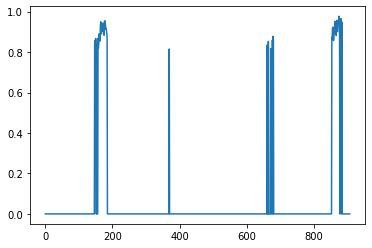

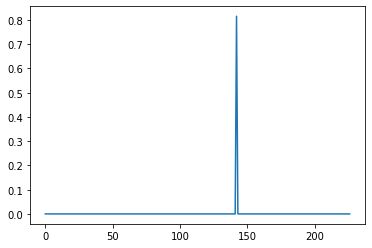

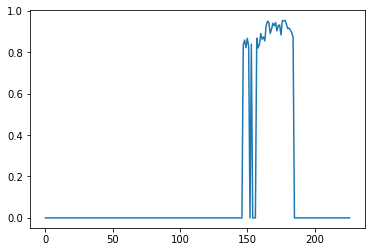

ValueError: ignored

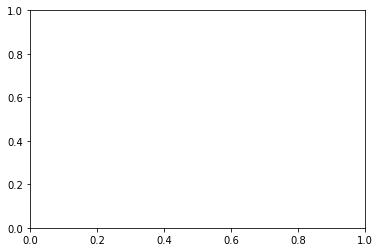

In [109]:
#manually selection 

import json
import numpy as np
import matplotlib.pyplot as plt

x = input ("Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) ")
if x == '1':
  Path = Path_Result_1
  print("Results of the landing sequence selection")
elif x == '2':
  Path = Path_Result_2
  print("Results of the landing/flight selection")
elif x == '3':
  Path = Path_Result_3
  print("Results of the landing frame selection")
else:
  print("Wrong choise - i show the results of the landing/flight selection")
  Path = Path_Result_3

with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])

pics = round((len(index))/4)

with open(Path[:-2] + "results.json", "r") as fp:
    resultdata = json.load(fp)


resultdata["Ordner"].append(xx)
resultdata["SOLL"].append(Labels[xx])


if 1 in cls:

    X = index
    Y = conf

    plt.plot(X, Y)
    plt.show()

    xaxis = np.arange(pics)
    y1 = conf[0:int(pics)]
    y2 = conf[int(pics):int(2*pics)]
    y3 = conf[int(2*pics):int(3*pics)]
    y4 = conf[int(3*pics):int(4*pics)]

    plt.plot(xaxis, y2)
    plt.show()
    plt.plot(xaxis, y1)
    plt.show()
    plt.plot(xaxis, y4)
    plt.show()
    plt.plot(xaxis, y3)
    plt.show()

    plt.plot(xaxis, y1)
    plt.plot(xaxis, y2)
    plt.plot(xaxis, y3)
    plt.plot(xaxis, y4)
    plt.show()

    detections = []
    for i, c in enumerate(cls):
        if c == 0 and cls[i-1] == 1:
            if i > int(3*pics):
                print("Landing detected in Pic ", i-3*pics-1, "in Cam 4")
                detections.append('Cam4_0' + str(i-3*pics-1)) 
            elif i > int(2*pics):
                print("Landing detected in Pic ", i-2*pics-1, "in Cam 3")
                detections.append('Cam3_0' + str(i-2*pics-1))
            elif i > int(pics):
                print("Landing detected in Pic ", i-pics-1, "in Cam 2")
                detections.append('Cam2_0' + str(i-pics-1))
            else:
                print("Landing detected in Pic ", i, "in Cam 1")
                detections.append('Cam1_0' + str(i))
    print("The Preselection would detect landings in following frames: ", detections)
    resultdata["Selection"].append(detections)

else:
  
    X = index
    Y = conf

    plt.plot(X, Y)
    plt.show()

    xaxis = np.arange(pics)
    #xaxis_2 = np.arange(pics-1)
    y1 = conf[0:int(pics)]
    y2 = conf[int(pics):int(2*pics)]
    y3 = conf[int(2*pics):int(3*pics)]
    y4 = conf[int(3*pics):int(4*pics)]

    plt.plot(xaxis, y2)
    plt.show()
    plt.plot(xaxis, y1)
    plt.show()
    plt.plot(xaxis, y4)
    plt.show()
    plt.plot(xaxis, y3)
    plt.show()

    plt.plot(xaxis, y1)
    plt.plot(xaxis, y2)
    plt.plot(xaxis, y3)
    plt.plot(xaxis, y4)
    plt.show()

    final_indexes = []
    for i, cf in enumerate(conf):
        if cf > 0:
          if i > int(3*pics):
            final_indexes.append(i-3*pics)
          elif i > int(2*pics):
            final_indexes.append(i-2*pics)
          elif i > int(pics):
            final_indexes.append(i-pics)
          else:
            final_indexes.append(i)  

    #print(final_indexes)

    #for i, k in enumerate(final_indexes):
      #if final_indexes[i] < final_indexes[i-1]:
        #print(i)    

    maxindex = np.argmax(conf)
    cam = 1
    if maxindex > 3*pics-1:
        maxindex = maxindex - 3*pics
        cam = 4
    elif maxindex > 2*pics-1:
        maxindex = maxindex - 2*pics
        cam = 3
    elif maxindex > pics-1:
        maxindex = maxindex - pics
        cam = 2
    #print("MIN INDEX: ", min(final_indexes))
    #print("MAX INDEX: ", max(final_indexes))
    #print("MAX CONF", max(conf))
    #print("INDEX MAX CONF", maxindex, "bei CAM", cam)
    #print("Lenght: ", len(final_indexes))
    print("The Preselection would detect the landing in following frame: Cam", cam , maxindex )
    resultdata["Selection"].append('Cam' + str(cam) + '_0' + str(maxindex))

print("By manually labeling following frame is the landing: ", Labels[xx])




with open(Path[:-2] + "results.json", "w") as fp:
    json.dump(resultdata, fp, indent=4)


In [97]:
#for auotmation
Labels = {'33':'Cam4_0196', '34':'Cam1_0198/Cam4_0198', '35':'Cam3_0219', '36':'Cam3_0215', '42':'Cam1_0170', '43':'Cam1_0151/Cam2_0151', '44':'Cam1_0179/Cam4_178', '45':'Cam1_0196/Cam4_0196', '46':'Cam4_0183', '47':'Cam1_0169/Cam4_0169', '48':'Cam3_0193/Cam4_0193'}
td = Labels.keys()
print(td)

dict_keys(['33', '34', '35', '36', '42', '43', '44', '45', '46', '47', '48'])


Path was not existing
Path was not existing
Path was not existing
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/33, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/33, name=confthres0.8, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-581-g367868e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/907 /content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/33/Cam1_0000.jpg: 384x640 (no dete

ValueError: ignored

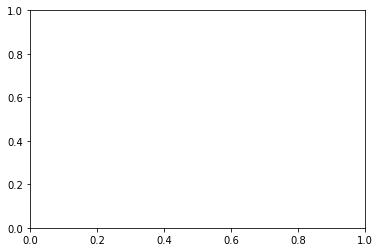

In [98]:
#automatically detection and selection 

import os
import json
import numpy as np
import matplotlib.pyplot as plt

for xx in td:

    landing_pic = "/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/" + xx

    Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
    if os.path.isdir(Path_Result_1):
      print("Path exists")
    else:
      os.mkdir(Path_Result_1)
      print("Path was not existing")

    Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
    if os.path.isdir(Path_Result_2):
      print("Path exists")
    else:
      os.mkdir(Path_Result_2)
      print("Path was not existing")


    Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
    if os.path.isdir(Path_Result_3):
      print("Path exists")
    else:
      os.mkdir(Path_Result_3)
      print("Path was not existing")

    #thres
    x = 0.8

    name = 'confthres' + str(x)

    %cd /content/yolov5
    #Skijumper only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

    #Landing Frame only
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

    #Landing and Flight
    #!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
    !python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}

    


    for x in ['1', '2', '3']:
        if x == '1':
          Path = Path_Result_1
          print("Results of the landing sequence selection")
        elif x == '2':
          Path = Path_Result_2
          print("Results of the landing/flight selection")
        elif x == '3':
          Path = Path_Result_3
          print("Results of the landing frame selection")
        else:
          print("Wrong choise - i show the results of the landing/flight selection")
          Path = Path_Result_3

        with open(Path + '/' + name + '/list.json', "r") as fp:
            data = json.load(fp)
          
        conf = np.array(data["conf"])
        index = np.array(data["index"])
        cls = np.array(data["cls"])
        x_center = np.array(data["x"])
        y_center = np.array(data["y"])

        pics = round((len(index))/4)

        with open(Path[:-2] + "results.json", "r") as fp:
            resultdata = json.load(fp)


        resultdata["Ordner"].append(xx)
        resultdata["SOLL"].append(Labels[xx])


        if 1 in cls:

            X = index
            Y = conf

            plt.plot(X, Y)
            plt.show()

            xaxis = np.arange(pics)
            y1 = conf[0:int(pics)]
            y2 = conf[int(pics):int(2*pics)]
            y3 = conf[int(2*pics):int(3*pics)]
            y4 = conf[int(3*pics):int(4*pics)]

            plt.plot(xaxis, y2)
            plt.show()
            plt.plot(xaxis, y1)
            plt.show()
            plt.plot(xaxis, y4)
            plt.show()
            plt.plot(xaxis, y3)
            plt.show()

            plt.plot(xaxis, y1)
            plt.plot(xaxis, y2)
            plt.plot(xaxis, y3)
            plt.plot(xaxis, y4)
            plt.show()

            detections = []
            for i, c in enumerate(cls):
                if c == 0 and cls[i-1] == 1:
                    if i > int(3*pics):
                        print("Landing detected in Pic ", i-3*pics-1, "in Cam 4")
                        detections.append('Cam4_0' + str(i-3*pics-1)) 
                    elif i > int(2*pics):
                        print("Landing detected in Pic ", i-2*pics-1, "in Cam 3")
                        detections.append('Cam3_0' + str(i-2*pics-1))
                    elif i > int(pics):
                        print("Landing detected in Pic ", i-pics-1, "in Cam 2")
                        detections.append('Cam2_0' + str(i-pics-1))
                    else:
                        print("Landing detected in Pic ", i, "in Cam 1")
                        detections.append('Cam1_0' + str(i))
            print("The Preselection would detect landings in following frames: ", detections)
            resultdata["Selection"].append(detections)

        else:
          
            X = index
            Y = conf

            plt.plot(X, Y)
            plt.show()

            xaxis = np.arange(pics)
            #xaxis_2 = np.arange(pics-1)
            y1 = conf[0:int(pics)]
            y2 = conf[int(pics):int(2*pics)]
            y3 = conf[int(2*pics):int(3*pics)]
            y4 = conf[int(3*pics):int(4*pics)]

            plt.plot(xaxis, y2)
            plt.show()
            plt.plot(xaxis, y1)
            plt.show()
            plt.plot(xaxis, y4)
            plt.show()
            plt.plot(xaxis, y3)
            plt.show()

            plt.plot(xaxis, y1)
            plt.plot(xaxis, y2)
            plt.plot(xaxis, y3)
            plt.plot(xaxis, y4)
            plt.show()

            final_indexes = []
            for i, cf in enumerate(conf):
                if cf > 0:
                  if i > int(3*pics):
                    final_indexes.append(i-3*pics)
                  elif i > int(2*pics):
                    final_indexes.append(i-2*pics)
                  elif i > int(pics):
                    final_indexes.append(i-pics)
                  else:
                    final_indexes.append(i)  

            #print(final_indexes)

            #for i, k in enumerate(final_indexes):
              #if final_indexes[i] < final_indexes[i-1]:
                #print(i)    

            maxindex = np.argmax(conf)
            cam = 1
            if maxindex > 3*pics-1:
                maxindex = maxindex - 3*pics
                cam = 4
            elif maxindex > 2*pics-1:
                maxindex = maxindex - 2*pics
                cam = 3
            elif maxindex > pics-1:
                maxindex = maxindex - pics
                cam = 2
            #print("MIN INDEX: ", min(final_indexes))
            #print("MAX INDEX: ", max(final_indexes))
            #print("MAX CONF", max(conf))
            #print("INDEX MAX CONF", maxindex, "bei CAM", cam)
            #print("Lenght: ", len(final_indexes))
            print("The Preselection would detect the landing in following frame: Cam", cam , maxindex )
            resultdata["Selection"].append('Cam' + str(cam) + '_0' + str(maxindex))

        print("By manually labeling following frame is the landing: ", Labels[xx])




        with open(Path[:-2] + "results.json", "w") as fp:
            json.dump(resultdata, fp, indent=4)

